In [ ]:
import warnings
warnings.filterwarnings("ignore")

A basket of stocks can be used to generate portfolios using machine learning’s principal component analysis(PCA). Traditionally PCA is used in machine learning to reduce the number of features while maintaining the variability in the data. This can be leveraged to build different portfolios. Each of these portfolios’ Sharpe ratio can be calculated to find out the most optimized portfolio.

In [ ]:
import yfinance as yf
import datetime

## **Question 1 : import the basket of asset AAPL, AMGN and AXP using YahooFinance. The start date is 2020 Jan. 1rst, the end yesterday**

In [ ]:
basket = ['AAPL', 'AMGN', 'AXP']

In [ ]:
yesterday = datetime.date.today() - datetime.timedelta(1)
start_date = datetime.datetime(2020,1,1)
end_date = yesterday

In [ ]:
data = yf.download(basket, start=start_date, end = end_date)
data.head()

/tmp/ipython-input-3675707149.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(basket, start=start_date, end = end_date)
[*********************100%***********************]  3 of 3 completed


Price           Close                               High              \
Ticker           AAPL        AMGN         AXP       AAPL        AMGN   
Date                                                                   
2020-01-02  72.538513  201.031113  116.638573  72.598892  203.618307   
2020-01-03  71.833298  199.666351  115.480072  72.594063  201.165078   
2020-01-06  72.405678  201.198517  114.979607  72.444321  201.324104   
2020-01-07  72.065147  199.306259  114.377182  72.671341  200.947335   
2020-01-08  73.224434  199.457016  116.351257  73.526326  200.595718   

Price                         Low                               Open  \
Ticker             AXP       AAPL        AMGN         AXP       AAPL   
Date                                                                   
2020-01-02  117.027830  71.292304  200.093350  115.137151  71.545890   
2020-01-03  115.943475  71.608692  197.799219  114.868383  71.765674   
2020-01-06  115.072293  70.703012  198.067083  114.108413  70.954188   
2020-01-07  115.294718  71.845369  198.929485  114.330839  72.415337   
2020-01-08  117.111238  71.768109  198.108994  114.738616  71.768109   

Price                                  Volume                    
Ticker            AMGN         AXP       AAPL     AMGN      AXP  
Date                                                             
2020-01-02  203.459222  115.535678  135480400  2088000  2708000  
2020-01-03  198.569516  115.220567  146322800  1879000  2090600  
2020-01-06  198.602942  114.340115  118387200  1802800  2855200  
2020-01-07  200.369609  114.432788  108872000  1518900  2042300  
2020-01-08  199.214197  114.970318  132079200  2214700  3458200

## **Question 2 : preprocessing**

Remove stocks that are missing more than 30% of the data

In [ ]:
missing_fractions = data.isnull().mean().sort_values(ascending=False)
drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))
data.drop(labels=drop_list, axis=1, inplace=True)

Check the remaining for missing values and fill missing values with the last available data withe the method fillna of the Pandas library

In [ ]:
data=data.fillna(method='ffill')

/tmp/ipython-input-4209732964.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data=data.fillna(method='ffill')


Drop the row 0 which is containing NAN

In [ ]:
data= data.dropna(axis=0)

data.head()

Price           Close                               High              \
Ticker           AAPL        AMGN         AXP       AAPL        AMGN   
Date                                                                   
2020-01-02  72.538513  201.031113  116.638573  72.598892  203.618307   
2020-01-03  71.833298  199.666351  115.480072  72.594063  201.165078   
2020-01-06  72.405678  201.198517  114.979607  72.444321  201.324104   
2020-01-07  72.065147  199.306259  114.377182  72.671341  200.947335   
2020-01-08  73.224434  199.457016  116.351257  73.526326  200.595718   

Price                         Low                               Open  \
Ticker             AXP       AAPL        AMGN         AXP       AAPL   
Date                                                                   
2020-01-02  117.027830  71.292304  200.093350  115.137151  71.545890   
2020-01-03  115.943475  71.608692  197.799219  114.868383  71.765674   
2020-01-06  115.072293  70.703012  198.067083  114.108413  70.954188   
2020-01-07  115.294718  71.845369  198.929485  114.330839  72.415337   
2020-01-08  117.111238  71.768109  198.108994  114.738616  71.768109   

Price                                  Volume                    
Ticker            AMGN         AXP       AAPL     AMGN      AXP  
Date                                                             
2020-01-02  203.459222  115.535678  135480400  2088000  2708000  
2020-01-03  198.569516  115.220567  146322800  1879000  2090600  
2020-01-06  198.602942  114.340115  118387200  1802800  2855200  
2020-01-07  200.369609  114.432788  108872000  1518900  2042300  
2020-01-08  199.214197  114.970318  132079200  2214700  3458200

## **Question 3**

Calculate the percentage of change of the adj closing price from one day to the next

In [ ]:
data_returns = data.pct_change(1)

Remove Outliers beyond 3 standard deviations

In [ ]:
data_returns = data_returns[data_returns.apply(lambda x :(x-x.mean()).abs()<(3*x.std()) ).all(1)]
data_returns.shape

(1282, 15)

## **Question 4**

Standardize the data so mean is zero and variance is 1

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(data_returns)
rescaled_data = pd.DataFrame(scaler.fit_transform(data_returns),columns = data_returns.columns,
                               index = data_returns.index)

Summarize transformed data

In [ ]:
data_returns.dropna(how='any', inplace=True)
rescaled_data.dropna(how='any', inplace=True)
rescaled_data.head()

Price          Close                          High                      \
Ticker          AAPL      AMGN       AXP      AAPL      AMGN       AXP   
Date                                                                     
2020-01-03 -0.530049 -0.431857 -0.457763 -0.063307 -0.825488 -0.485324   
2020-01-06  0.340770  0.438123 -0.222631 -0.180078  0.027778 -0.401919   
2020-01-07 -0.282989 -0.589229 -0.260665  0.123891 -0.149138  0.047819   
2020-01-08  0.740413  0.022021  0.684245  0.628788 -0.141053  0.705876   
2020-01-09  0.994121  0.155801  0.718797  1.091493  0.005751  0.528481   

Price            Low                          Open                      \
Ticker          AAPL      AMGN       AXP      AAPL      AMGN       AXP   
Date                                                                     
2020-01-03  0.188212 -0.771636 -0.151481  0.095966 -1.496476 -0.164127   
2020-01-06 -0.751042  0.063956 -0.350232 -0.600084 -0.013696 -0.382559   
2020-01-07  0.832460  0.259491  0.047358  0.944086  0.521006 -0.006866   
2020-01-08 -0.114873 -0.293156  0.122436 -0.485375 -0.377311  0.165905   
2020-01-09  1.616603  0.350335  0.928007  1.589241  0.429204  0.831429   

Price         Volume                      
Ticker          AAPL      AMGN       AXP  
Date                                      
2020-01-03  0.102412 -0.383781 -0.687083  
2020-01-06 -0.686170 -0.251898  0.678499  
2020-01-07 -0.364435 -0.510877 -0.817535  
2020-01-08  0.489886  0.852578  1.431884  
2020-01-09  0.707492 -0.747838 -0.609042

## **Question 5**

Split the data into test and train so we can try to backtest using the test dataset. We will use the raw dataset to create returns for different portfolios.

In [ ]:
percentage = int(len(rescaled_data) * 0.8)
X_train = rescaled_data[:percentage]
X_test = rescaled_data[percentage:]

X_train_raw = data_returns[:percentage]
X_test_raw = data_returns[percentage:]

In [ ]:
X_train

Price          Close                          High                      \
Ticker          AAPL      AMGN       AXP      AAPL      AMGN       AXP   
Date                                                                     
2020-01-03 -0.530049 -0.431857 -0.457763 -0.063307 -0.825488 -0.485324   
2020-01-06  0.340770  0.438123 -0.222631 -0.180078  0.027778 -0.401919   
2020-01-07 -0.282989 -0.589229 -0.260665  0.123891 -0.149138  0.047819   
2020-01-08  0.740413  0.022021  0.684245  0.628788 -0.141053  0.705876   
2020-01-09  0.994121  0.155801  0.718797  1.091493  0.005751  0.528481   
...              ...       ...       ...       ...       ...       ...   
2024-08-07  0.563768 -3.031663 -0.462202  0.957335 -2.016702  0.566255   
2024-08-08  0.767327  2.323029  0.829455  0.093920  0.411454 -0.380839   
2024-08-09  0.624693 -0.431070  0.734469  0.645149 -0.041110  0.735385   
2024-08-12  0.299508 -0.487946 -0.181882  0.745801 -0.257863  0.085631   
2024-08-13  0.794875  0.625069  0.303090  0.574809 -0.004233  0.011570   

Price            Low                          Open                      \
Ticker          AAPL      AMGN       AXP      AAPL      AMGN       AXP   
Date                                                                     
2020-01-03  0.188212 -0.771636 -0.151481  0.095966 -1.496476 -0.164127   
2020-01-06 -0.751042  0.063956 -0.350232 -0.600084 -0.013696 -0.382559   
2020-01-07  0.832460  0.259491  0.047358  0.944086  0.521006 -0.006866   
2020-01-08 -0.114873 -0.293156  0.122436 -0.485375 -0.377311  0.165905   
2020-01-09  1.616603  0.350335  0.928007  1.589241  0.429204  0.831429   
...              ...       ...       ...       ...       ...       ...   
2024-08-07  1.398757 -3.435285  0.368804  0.324514 -0.822772  1.339814   
2024-08-08  0.594165  1.293816  0.464726  1.400159 -1.358219 -0.607018   
2024-08-09  0.770834  1.338530  0.374833 -0.282148  1.878449  0.432298   
2024-08-12  0.950394 -0.310084  0.416901  0.910390  0.004371  0.847938   
2024-08-13  0.813720  0.229919  0.167870  0.605909 -0.425021  0.052276   

Price         Volume                      
Ticker          AAPL      AMGN       AXP  
Date                                      
2020-01-03  0.102412 -0.383781 -0.687083  
2020-01-06 -0.686170 -0.251898  0.678499  
2020-01-07 -0.364435 -0.510877 -0.817535  
2020-01-08  0.489886  0.852578  1.431884  
2020-01-09  0.707492 -0.747838 -0.609042  
...              ...       ...       ...  
2024-08-07 -0.387216  1.821418 -0.515496  
2024-08-08 -0.879948 -1.059724 -0.530401  
2024-08-09 -0.436578 -0.936461 -0.453179  
2024-08-12 -0.418339 -0.109627 -0.408876  
2024-08-13  0.338432 -0.399351  0.056116  

[1160 rows x 15 columns]

## **Question 6**

## **An example**

In [ ]:
X = np.array([[-1, -1,5], [-2, -1,5], [-3, -2,1], [1, 1,0], [2, 1,-1], [3, 2,4]])
X

array([[-1, -1,  5],
       [-2, -1,  5],
       [-3, -2,  1],
       [ 1,  1,  0],
       [ 2,  1, -1],
       [ 3,  2,  4]])

In [ ]:
pca = PCA(n_components=2)
pca.fit(X.T)


PCA(n_components=2)

In [ ]:
pca.components_

array([[ 0.594433  ,  0.65231558,  0.35509908, -0.09907217, -0.25602692,
         0.14026175],
       [ 0.40345811, -0.16154654, -0.36327559, -0.06724302,  0.43051861,
         0.69949068]])

## **Our usecase**

Apply PCA on the train dataset

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train.T)

PCA()

Display the PCA components

In [ ]:
pca.components_

array([[ 0.01126346, -0.01105274,  0.0164232 , ...,  0.02162232,
         0.02471555,  0.01115586],
       [-0.0093049 ,  0.00696161,  0.0156729 , ...,  0.02246402,
         0.00179587,  0.01041543],
       [ 0.02000496, -0.00771346,  0.00768215, ..., -0.01664783,
         0.01909764,  0.01738629],
       ...,
       [-0.00129935, -0.00256532,  0.00307249, ..., -0.01497245,
        -0.00189455,  0.00556758],
       [ 0.01867882, -0.01331665, -0.01321871, ...,  0.02941879,
         0.02518833,  0.00090304],
       [ 0.19842683, -0.21997728, -0.25539652, ...,  0.00879065,
         0.0038034 ,  0.00436233]])

Plot the zero-th and third PCA component. What is their meaning

In [ ]:
import matplotlib.pyplot as plt

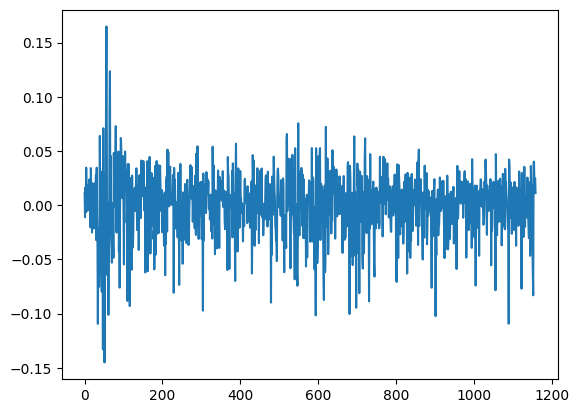

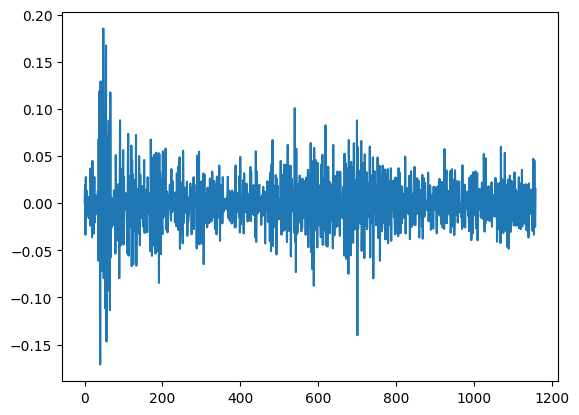

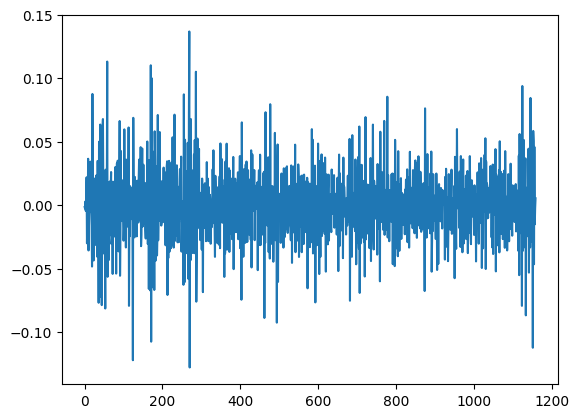

In [ ]:
l=[0,3,12]
for i in l:
  plt.plot(pca.components_[i])
  plt.show()

What is the explained variance ration of each component?

In [ ]:
pca.explained_variance_ratio_

array([2.48552604e-01, 2.03045867e-01, 1.66755613e-01, 1.00857385e-01,
       6.76399094e-02, 5.57704478e-02, 4.50298471e-02, 3.38678812e-02,
       2.84679627e-02, 1.63177707e-02, 1.28034112e-02, 1.08078489e-02,
       5.57777438e-03, 4.50567753e-03, 2.06195201e-32])